# Sentiment Analysis
We'll be using Keras to build and train a neural network that analyzes text for sentiment.
<br>We'll be using a built in dataset in Keras - the IMDB movie reviews sentiment classification. 
The IMDB dataset contains 50,000 movie reviews that have been individually scored as positive (1) or negative (0). The dataset is divided into 25,000 reviews for training and 25,000 reviews for testing. The sentiment that's expressed in these reviews is the basis for which our neural network will analyze text presented to it and score it for sentiment.
For more datasets in Keras visit The IMDB dataset is one of several useful datasets included with Keras https://keras.io/datasets/.


Load the IMDB dataset and create a dictionary mapping the words in all 50,000 reviews to integers indicating the words' relative frequency of occurrence. 

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import string
import numpy as np

from keras.preprocessing import sequence
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.embeddings import Embedding
from keras.layers import Flatten

top_words = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=top_words)
print(x_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


The variable named ** x_train ** is a list of 25,000 lists, each of which represents one movie review. 
You will notice the dataset is encoded as a collection of integers rather than words

In [29]:
#To decode the first review in x_train in textual format
word_dict = imdb.get_word_index()
word_dict = { key:(value + 3) for key, value in word_dict.items() }
word_dict[''] = 0  # Padding
word_dict['>'] = 1 # Start
word_dict['?'] = 2 # Unknown word
reverse_word_dict = { value:key for key, value in word_dict.items() }
print(' '.join(reverse_word_dict[id] for id in x_train[0]))

> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

 Since the lists representing reviews in x_train and x_test have varying lengths.We can change the lengths so that all have a length of 500 integers.
<br>Pad_sequence function takes a list of lists as input and converts the inner lists to a specified length by truncating them if necessary or padding them with 0s.

In [30]:

max_review_length = 500
x_train = sequence.pad_sequences(x_train, maxlen=max_review_length)
x_test = sequence.pad_sequences(x_test, maxlen=max_review_length)

# **We can now create our model!**
A **sequential model** in Keras is composed of an end-to-end stack of layers in which the output from one layer provides input to the next.
<br>First we will add an embedding layer, which is crucial to neural networks that process words. The embedding layer will map many-dimensional arrays containing integer word indexes into floating-point arrays containing fewer dimensions.
<br>**Flatten function** reshapes the output for input to the next layer.

In [31]:

embedding_vector_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vector_length, input_length=max_review_length))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 500, 32)           320000    
_________________________________________________________________
flatten_3 (Flatten)          (None, 16000)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 16)                256016    
_________________________________________________________________
dense_10 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 17        
Total params: 576,305
Trainable params: 576,305
Non-trainable params: 0
_________________________________________________________________
None


## Train the neural network

In [32]:
hist = model.fit(
    x_train, y_train, 
    validation_data=(x_test, y_test), 
    epochs=5, 
    batch_size=128)

Epoch 1/5
196/196 [==============================] - 5s 24ms/step - loss: 0.5773 - accuracy: 0.6345 - val_loss: 0.3293 - val_accuracy: 0.8569
Epoch 2/5
196/196 [==============================] - 5s 23ms/step - loss: 0.2091 - accuracy: 0.9173 - val_loss: 0.2914 - val_accuracy: 0.8774
Epoch 3/5
196/196 [==============================] - 5s 23ms/step - loss: 0.0659 - accuracy: 0.9825 - val_loss: 0.3486 - val_accuracy: 0.8723
Epoch 4/5
196/196 [==============================] - 5s 24ms/step - loss: 0.0145 - accuracy: 0.9978 - val_loss: 0.4168 - val_accuracy: 0.8687
Epoch 5/5
196/196 [==============================] - 5s 24ms/step - loss: 0.0035 - accuracy: 0.9997 - val_loss: 0.4848 - val_accuracy: 0.8688


## Visualize the changes in Training and Validation Accuracy 

[]

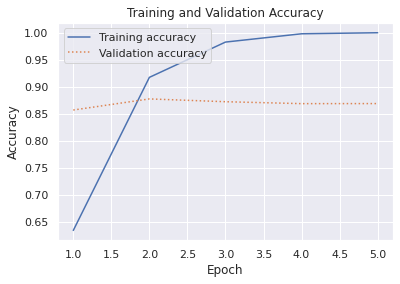

In [35]:
sns.set()
acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.plot()

Validation accuracy levels off after 2 epochs, thus we may need fewer than 5 epochs to get our best (and least overfit) result.



## Now to visualize the changes in Training and Validation Loss

[]

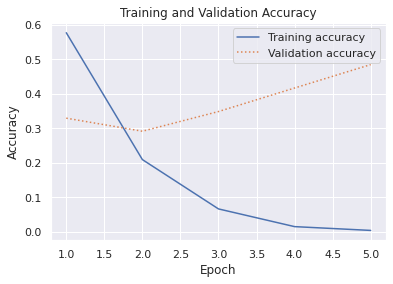

In [37]:
#To Vizualize the Loss of our model
sns.set()
acc = hist.history['loss']
val = hist.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')
plt.plot()

## Determine accuracy of model

In [ ]:
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1] * 100))

# Analyze Text for Sentiment
The function **analyze** accepts a string as input and returns a number from 0.0 to 1.0 quantifying the sentiment expressed in that string. 
<br> The function cleans the input string, converts it into a list of integers referencing words in the dictionary created by the load_data function, and finally calls the model's predict function to score the text for sentiment.



In [39]:
def analyze(text):
    # Prepare the input by removing punctuation characters, converting
    # characters to lower case, and removing words containing numbers
    translator = str.maketrans('', '', string.punctuation)
    text = text.translate(translator)
    text = text.lower().split(' ')
    text = [word for word in text if word.isalpha()]

    # Generate an input tensor
    input = [1]
    for word in text:
        if word in word_dict and word_dict[word] < top_words:
            input.append(word_dict[word])
        else:
            input.append(2)
    padded_input = sequence.pad_sequences([input], maxlen=max_review_length)

    # Invoke the model and return the result
    result = model.predict(np.array([padded_input][0]))[0][0]
    return result

### Let's try out our model with a few reviews

In [40]:
analyze('Easily the most stellar experience I have ever had.')

0.9960686

In [41]:
analyze('The long lines and poor customer service really turned me off.')

0.09493205